In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_bgr = cv2.imread('/content/cv.jpeg')


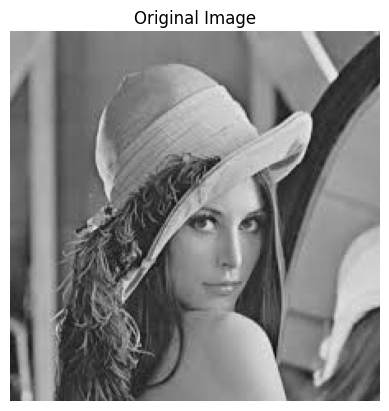

In [27]:
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()


In [28]:
height, width, channels = image_bgr.shape
print(f"Image Dimensions: Height={height}px, Width={width}px, Channels={channels}")


Image Dimensions: Height=225px, Width=225px, Channels=3


In [29]:
total_pixels = height * width
print(f"Total Number of Pixels: {total_pixels}")


Total Number of Pixels: 50625


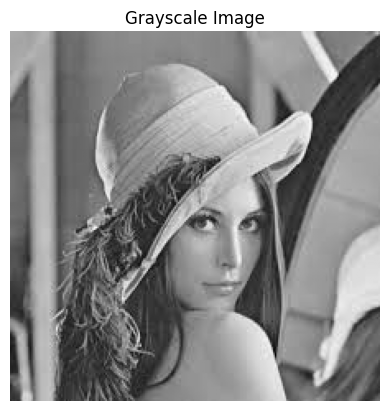

True

In [30]:
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

plt.imshow(image_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()
cv2.imwrite('image_grayscale.jpg', image_gray)


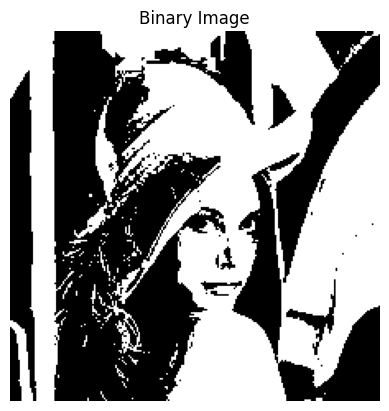

In [31]:
threshold_value = 127  # You can adjust this value as needed

_, image_binary = cv2.threshold(image_gray, threshold_value, 255, cv2.THRESH_BINARY)

plt.imshow(image_binary, cmap='gray')
plt.title('Binary Image')
plt.axis('off')
plt.show()


In [32]:
cv2.imwrite('image_binary.jpg', image_binary)


True

In [33]:
# Count black pixels
black_pixels = np.sum(image_binary == 0)
print(f"Number of Black Pixels: {black_pixels}")

image_size = image_binary.size
print(f"Size of Image (number of pixels): {image_size}")
black_area = black_pixels
print(f"Area of Black Pixels: {black_area} square units")


Number of Black Pixels: 24653
Size of Image (number of pixels): 50625
Area of Black Pixels: 24653 square units


TASK 2


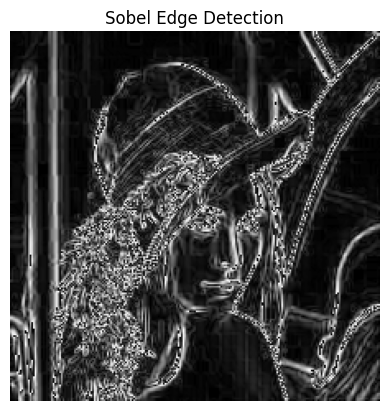

True

In [34]:
sobelx = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)
sobel = np.uint8(np.absolute(sobel))
plt.imshow(sobel, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')
plt.show()
cv2.imwrite('sobel_edge.jpg', sobel)


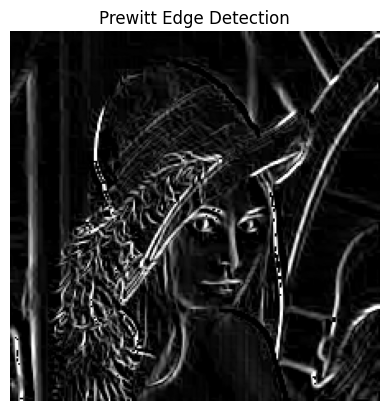

True

In [35]:
prewitt_kernelx = np.array([[ -1, 0, 1],
                            [ -1, 0, 1],
                            [ -1, 0, 1]])
prewitt_kernely = np.array([[ 1,  1,  1],
                            [ 0,  0,  0],
                            [-1, -1, -1]])
prewittx = cv2.filter2D(image_gray, -1, prewitt_kernelx)
prewitty = cv2.filter2D(image_gray, -1, prewitt_kernely)
prewitt = cv2.magnitude(prewittx.astype(np.float32), prewitty.astype(np.float32))
prewitt = np.uint8(prewitt)
plt.imshow(prewitt, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')
plt.show()
cv2.imwrite('prewitt_edge.jpg', prewitt)

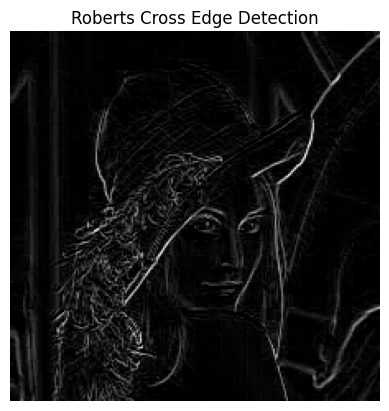

True

In [36]:
roberts_kernelx = np.array([[1, 0],
                            [0, -1]])
roberts_kernely = np.array([[0, 1],
                            [-1, 0]])
robertsx = cv2.filter2D(image_gray, -1, roberts_kernelx)
robertsy = cv2.filter2D(image_gray, -1, roberts_kernely)
roberts = cv2.magnitude(robertsx.astype(np.float32), robertsy.astype(np.float32))
roberts = np.uint8(roberts)
plt.imshow(roberts, cmap='gray')
plt.title('Roberts Cross Edge Detection')
plt.axis('off')
plt.show()
cv2.imwrite('roberts_edge.jpg', roberts)

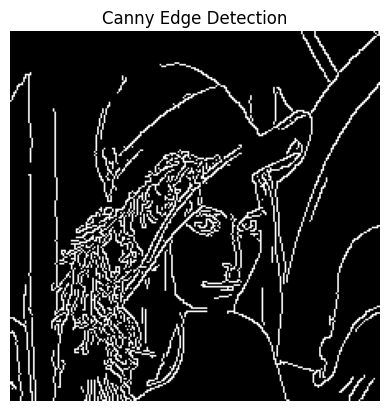

True

In [37]:
canny = cv2.Canny(image_gray, 100, 200)
plt.imshow(canny, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()
cv2.imwrite('canny_edge.jpg', canny)

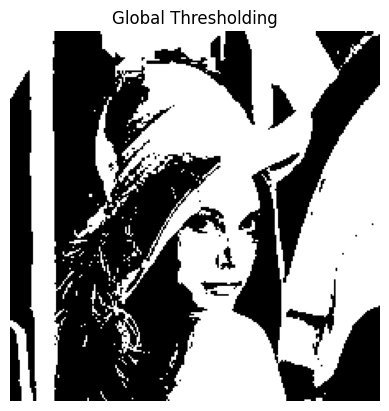

True

In [38]:
# Step 2.i: Global Thresholding
_, global_thresh = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(global_thresh, cmap='gray')
plt.title('Global Thresholding')
plt.axis('off')
plt.show()
cv2.imwrite('global_threshold.jpg', global_thresh)

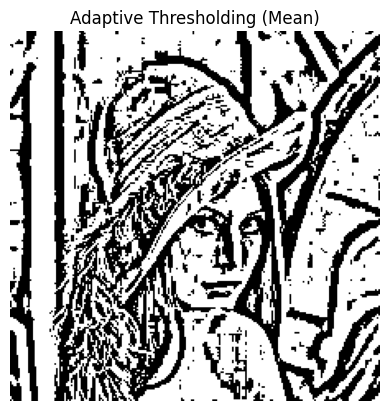

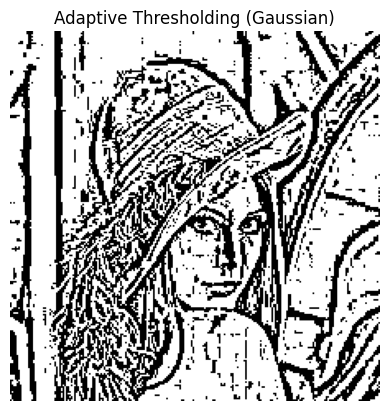

True

In [39]:
# Step 2.ii: Adaptive Thresholding
adaptive_thresh_mean = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                             cv2.THRESH_BINARY, 11, 2)
adaptive_thresh_gaussian = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                               cv2.THRESH_BINARY, 11, 2)
plt.imshow(adaptive_thresh_mean, cmap='gray')
plt.title('Adaptive Thresholding (Mean)')
plt.axis('off')
plt.show()
plt.imshow(adaptive_thresh_gaussian, cmap='gray')
plt.title('Adaptive Thresholding (Gaussian)')
plt.axis('off')
plt.show()
cv2.imwrite('adaptive_threshold_mean.jpg', adaptive_thresh_mean)
cv2.imwrite('adaptive_threshold_gaussian.jpg', adaptive_thresh_gaussian)

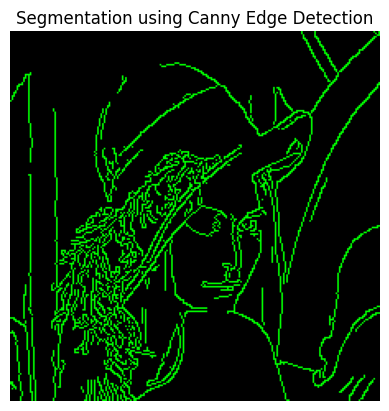

True

In [40]:
# Step 2.iii: Edge Detection for Segmentation (Canny)
contours, hierarchy = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
segmented_image = np.zeros_like(image_rgb)
cv2.drawContours(segmented_image, contours, -1, (0, 255, 0), 1)
plt.imshow(segmented_image)
plt.title('Segmentation using Canny Edge Detection')
plt.axis('off')
plt.show()
cv2.imwrite('segmentation_canny.jpg', segmented_image)

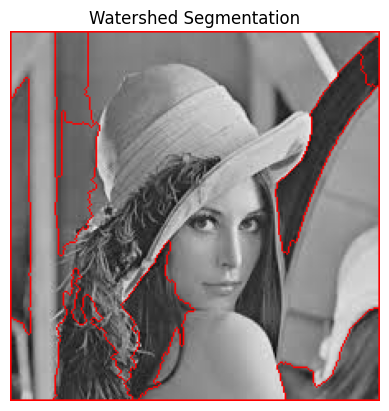

True

In [41]:
# Step 2.iv: Watershed Algorithm
image_rgb_watershed = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image_rgb_watershed, cv2.COLOR_RGB2GRAY)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0
markers = cv2.watershed(image_bgr, markers)
image_rgb_watershed[markers == -1] = [255, 0, 0]
plt.imshow(image_rgb_watershed)
plt.title('Watershed Segmentation')
plt.axis('off')
plt.show()
cv2.imwrite('watershed_segmentation.jpg', cv2.cvtColor(image_rgb_watershed, cv2.COLOR_RGB2BGR))